<a href="https://colab.research.google.com/github/jake-trinder/dutch-bro-data-analysis/blob/main/Dutch_Bros_Location_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating A Heatmap For Dutch Bros Coffee Shops In The USA



In this notebook, I will be using a dataset found on Kaggle. The link to this dataset is https://www.kaggle.com/datasets/thedevastator/dutch-bros-locations-geolocation-data-for-us?select=DutchBrosLocations20211025.csv

## Uploading And Viewing The Data

In [44]:
# Here I will import the necessary packages that I will use for data exploration and analysis.

import pandas as pd
import plotly.express as px

In [45]:
# I will use pandas to open the csv file.

df = pd.read_csv('DutchBrosLocations20211025.csv')

In [46]:
# Now the file is uploaded, we can take a closer look into the data.

# By entering df (data frame) we can take a look at the data as whole.

df

,index,Address,State,City,Postal Code,Index,Location,Latitude,Longitude
0,0,301 Regent St,AZ,Flagstaff,86001,1,"301 Regent St Flagstaff, AZ",35.192266,-111.642786
1,1,1771 N Fourth St,AZ,Flagstaff,86004,2,"1771 N Fourth St Flagstaff, AZ",35.205072,-111.612581
2,2,"2250 Highway 95, Suit 42",AZ,Bullhead City,86442,3,"2250 Highway 95, Suit 42 Bullhead City, AZ",35.104607,-114.596733
3,3,3701 N Stockton Hill Rd,AZ,Kingman,86409,4,"3701 N Stockton Hill Rd Kingman, AZ",35.230096,-114.037474
4,4,5963 E State Rt 69,AZ,Prescott Valley,86314,5,"5963 E State Rt 69 Prescott Valley, AZ",34.578844,-112.361398
...,...,...,...,...,...,...,...,...,...
564,564,5314 Pacific Hwy E,WA,Fife,98424,565,"5314 Pacific Hwy E Fife, WA",47.242756,-122.357464
565,565,6229 Lake Grove St SW,WA,Lakewood,98499,566,"6229 Lake Grove St SW Lakewood, WA",47.168617,-122.520480
566,566,8624 Steilacoom Blvd,WA,SW Lakewood,98498,567,"8624 Steilacoom Blvd SW Lakewood, WA",47.178956,-122.552984
567,567,3623 Bethel RD,WA,SE Port Orchard,98366,568,"3623 Bethel RD SE Port Orchard, WA",47.515062,-122.630266


We can see from the data above all of the different features that are included in our data frame. I can see that there are two index columns so to clean the data, we should remove one as it clutters the data.

# Cleaning The Data

## Removing A Column From Our Dataset

In [47]:
# We will make a copy of the data before we remove the index column index column.

df2 = df.copy()

In [48]:
# We can now drop the "Index" column from our data.

df2 = df2.drop('Index', axis=1)

In [49]:
# This is to check that the column has been removed.

df2

# Success!

,index,Address,State,City,Postal Code,Location,Latitude,Longitude
0,0,301 Regent St,AZ,Flagstaff,86001,"301 Regent St Flagstaff, AZ",35.192266,-111.642786
1,1,1771 N Fourth St,AZ,Flagstaff,86004,"1771 N Fourth St Flagstaff, AZ",35.205072,-111.612581
2,2,"2250 Highway 95, Suit 42",AZ,Bullhead City,86442,"2250 Highway 95, Suit 42 Bullhead City, AZ",35.104607,-114.596733
3,3,3701 N Stockton Hill Rd,AZ,Kingman,86409,"3701 N Stockton Hill Rd Kingman, AZ",35.230096,-114.037474
4,4,5963 E State Rt 69,AZ,Prescott Valley,86314,"5963 E State Rt 69 Prescott Valley, AZ",34.578844,-112.361398
...,...,...,...,...,...,...,...,...
564,564,5314 Pacific Hwy E,WA,Fife,98424,"5314 Pacific Hwy E Fife, WA",47.242756,-122.357464
565,565,6229 Lake Grove St SW,WA,Lakewood,98499,"6229 Lake Grove St SW Lakewood, WA",47.168617,-122.520480
566,566,8624 Steilacoom Blvd,WA,SW Lakewood,98498,"8624 Steilacoom Blvd SW Lakewood, WA",47.178956,-122.552984
567,567,3623 Bethel RD,WA,SE Port Orchard,98366,"3623 Bethel RD SE Port Orchard, WA",47.515062,-122.630266


## Checking For Null Values In Our Dataset

In [50]:
# Sum the amount of missing values in each column.

df2.isna().sum()

index          0
Address        0
State          0
City           0
Postal Code    0
Location       0
Latitude       0
Longitude      0
dtype: int64

It seems our data is clean and there are no missing values. Here is another way to check.

In [51]:
# Another way to check is below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        569 non-null    int64  
 1   Address      569 non-null    object 
 2   State        569 non-null    object 
 3   City         569 non-null    object 
 4   Postal Code  569 non-null    int64  
 5   Index        569 non-null    int64  
 6   Location     569 non-null    object 
 7   Latitude     569 non-null    float64
 8   Longitude    569 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 40.1+ KB


We can see that the total number of non-null items is the same as the number of entries, meaning that there is no missing values. This make the data cleaning process a lot easier.

## Finding Unique Data Entries

In [52]:
# Let's check to see if the location names are all entered in a similar way.

df2['City'].unique()

array(['Flagstaff', 'Bullhead City', 'Kingman', 'Prescott Valley',
       'Prescott', 'Cottonwood', 'Peoria', 'Goodyear', 'Surprise',
       'Glendale', 'Buckeye', 'Tempe', 'Phoenix', 'Scottsdale', 'Mesa',
       'Gilbert', 'Chandler', 'Cave Creek ', 'Maricopa', 'Casa Grande',
       'Tucson', 'Oro Valley', 'Tucson ', 'Green Valley', 'Sierra Vista',
       'Yuma ', 'Yuma', 'Queen Creek', 'San Tan Valley',
       'Apache Junction', 'Payson', 'Sonoma', 'Napa', 'Stockton',
       'Manteca', 'Lathrop', 'Ripon', 'Oakdale', 'Turlock', 'Modesto',
       'Merced', 'Los Banos', 'Fresno', 'Clovis', 'Sanger', 'Madera',
       'Roseville', 'Granite Bay', 'Red Bluff', 'Orland', 'Oroville',
       'Paradise', 'Elk Grove', 'Sacramento', 'Lodi', 'Galt',
       'Citrus Heights', 'Fair Oaks', 'Carmichael', 'Antelope',
       'Santa Rosa', 'Crescent City', 'Auburn', 'Rocklin', 'Grass Valley',
       'Eureka', 'Woodland', 'Davis', 'Dixon', 'Oakley', 'Brentwood',
       'Redding', 'Palo Cedro', 'Anderson',

In [53]:
# We can also see the counts of each City.

df['City'].value_counts()

Las Vegas           18
Medford             11
Salem               10
Colorado Springs    10
Portland            10
                    ..
Castle Rock          1
Moscow               1
Post Falls           1
Payette              1
Bremerton            1
Name: City, Length: 299, dtype: int64

In [54]:
# Let's check the same info by state.

df['State'].value_counts()

OR    155
CA    115
WA     65
AZ     64
TX     41
ID     35
CO     34
NV     26
UT     17
OK      8
NM      6
TN      2
KS      1
Name: State, dtype: int64

In [55]:
df['State'].unique()

array(['AZ', 'CA', 'CO', 'ID', 'KS', 'NM', 'NV', 'OK', 'OR', 'TN', 'TX',
       'UT', 'WA'], dtype=object)

# Visualising The Data

## Countplot Of States and Cities

In [56]:
# Here we import seaborn and matplotlib to use the countplot feature in the package.

import seaborn as sns
import matplotlib.pyplot as plt



### Countplot Of States

In [57]:
df2 = df2.sort_values(by=['State'],ascending=True)
df2.head()


,index,Address,State,City,Postal Code,Location,Latitude,Longitude
0,0,301 Regent St,AZ,Flagstaff,86001,"301 Regent St Flagstaff, AZ",35.192266,-111.642786
34,34,3665 W Chandler Blvd,AZ,Chandler,85226,"3665 W Chandler Blvd Chandler, AZ",33.305147,-111.905102
35,35,1370 S Higley Rd,AZ,Gilbert,85296,"1370 S Higley Rd Gilbert, AZ",33.325432,-111.721889
36,36,34350 N Cave creek road,AZ,Cave Creek,85331,"34350 N Cave creek road Cave Creek , AZ",33.795950,-111.966367
37,37,8975 N 90th Street,AZ,Scottsdale,85250,"8975 N 90th Street Scottsdale, AZ",33.567609,-111.886916


In [58]:
df['City'].unique()

array(['Flagstaff', 'Bullhead City', 'Kingman', 'Prescott Valley',
       'Prescott', 'Cottonwood', 'Peoria', 'Goodyear', 'Surprise',
       'Glendale', 'Buckeye', 'Tempe', 'Phoenix', 'Scottsdale', 'Mesa',
       'Gilbert', 'Chandler', 'Cave Creek ', 'Maricopa', 'Casa Grande',
       'Tucson', 'Oro Valley', 'Tucson ', 'Green Valley', 'Sierra Vista',
       'Yuma ', 'Yuma', 'Queen Creek', 'San Tan Valley',
       'Apache Junction', 'Payson', 'Sonoma', 'Napa', 'Stockton',
       'Manteca', 'Lathrop', 'Ripon', 'Oakdale', 'Turlock', 'Modesto',
       'Merced', 'Los Banos', 'Fresno', 'Clovis', 'Sanger', 'Madera',
       'Roseville', 'Granite Bay', 'Red Bluff', 'Orland', 'Oroville',
       'Paradise', 'Elk Grove', 'Sacramento', 'Lodi', 'Galt',
       'Citrus Heights', 'Fair Oaks', 'Carmichael', 'Antelope',
       'Santa Rosa', 'Crescent City', 'Auburn', 'Rocklin', 'Grass Valley',
       'Eureka', 'Woodland', 'Davis', 'Dixon', 'Oakley', 'Brentwood',
       'Redding', 'Palo Cedro', 'Anderson',

Text(0.5, 1.0, 'Number of Stores in Each State')

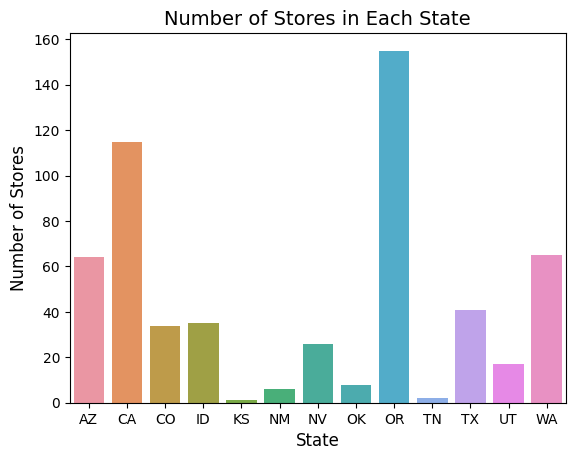

In [59]:
# Here I will display a countplot of the number of stores in each state.

sns.countplot(x=df2["State"])

plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.title('Number of Stores in Each State', fontsize=14)


Text(0.5, 1.0, 'Number of Stores in Each State')

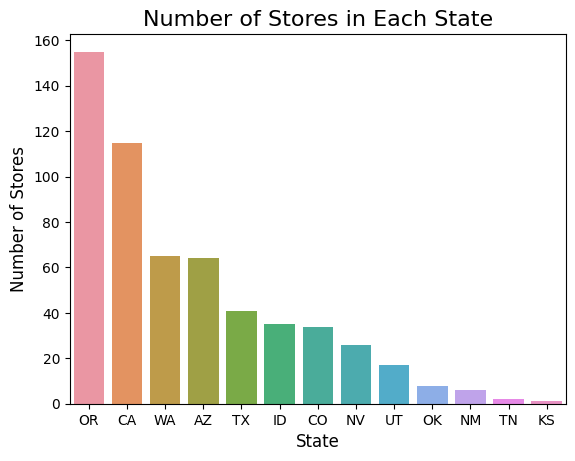

In [60]:
# Here we will display the same graph in descending order.

sns.countplot(x=df2["State"],order = df2['State'].value_counts().index)

plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.title('Number of Stores in Each State', fontsize=16)


Text(0.5, 1.0, 'Number of Stores in Each State')

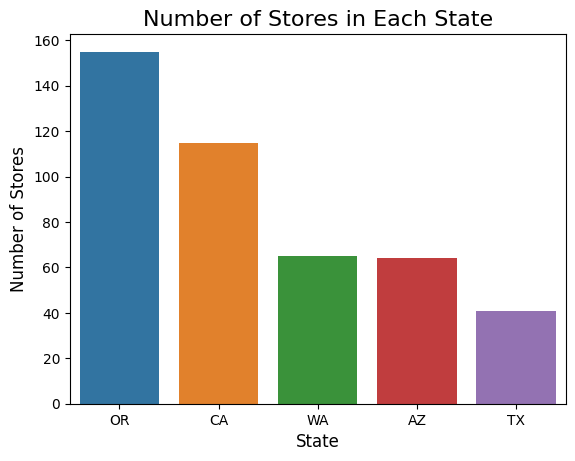

In [61]:
# Here i will display the top 5 states with the most stores.

sns.countplot(x=df2["State"],order = df2['State'].value_counts().index[:5])

plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.title('Number of Stores in Each State', fontsize=16)


Considering Dutch Bros was founded in Grants Pass, Oregon, it make sense that of the top 5 states with the most stores, 4 of them are on the west coast of the US.

## Countplot Of Cities

Text(0.5, 1.0, 'Number of Stores in Each City')

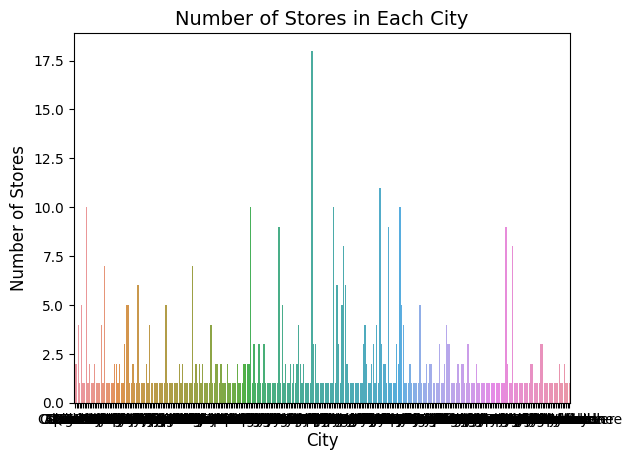

In [62]:
sns.countplot(x=df2["City"])


plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.title('Number of Stores in Each City', fontsize=14)


Text(0.5, 1.0, 'Number of Stores in Each City')

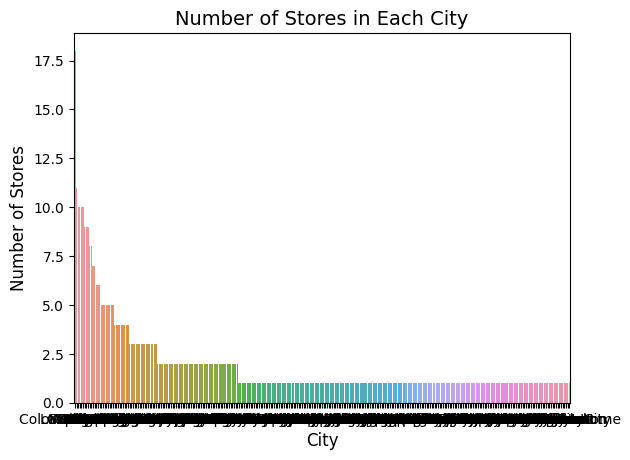

In [63]:
# Here we can put the graph in descending order.

sns.countplot(x=df2["City"],order = df2['City'].value_counts().index)

plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.title('Number of Stores in Each City', fontsize=14)


We can clearly see the data is unreadable in this format and so we can use the .head() function to cut it down to the top 10 or 20 cities.

[Text(0, 0, 'Las Vegas'),
 Text(1, 0, 'Medford'),
 Text(2, 0, 'Colorado Springs'),
 Text(3, 0, 'Salem'),
 Text(4, 0, 'Portland'),
 Text(5, 0, 'Tucson'),
 Text(6, 0, 'Boise'),
 Text(7, 0, 'Spokane'),
 Text(8, 0, 'Grants Pass'),
 Text(9, 0, 'Eugene'),
 Text(10, 0, 'Vancouver'),
 Text(11, 0, 'Fresno'),
 Text(12, 0, 'Phoenix'),
 Text(13, 0, 'Roseburg'),
 Text(14, 0, 'Bend'),
 Text(15, 0, 'Redding'),
 Text(16, 0, 'Corvallis'),
 Text(17, 0, 'Chico'),
 Text(18, 0, 'Bakersfield'),
 Text(19, 0, 'Meridian')]

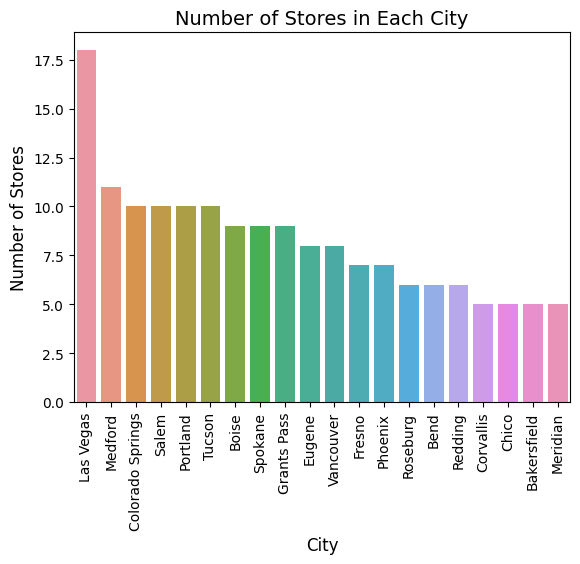

In [64]:
# Here we will put the top 20 cities.

my_plot = sns.countplot(x=df2["City"],order = df2['City'].value_counts().index[:20])

plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Stores', fontsize=12)
plt.title('Number of Stores in Each City', fontsize=14)

# I used this piece of code to make sure the City names didn't overlap on the X axis.
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

# Visualising store locations on a heatmap.

In [65]:
!pip install folium

## Folium Standard Street Map

In [66]:
import folium

# Create a folium map centered around the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 3  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='red',
        fill=False,
        fill_color='red',
        fill_opacity=0.5
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m

## Folium Stamen Watercolour Map

In [67]:
# Here we use the same block of code but use a different map type in the folio package.

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='Stamen Watercolor')

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 3  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m

## Folium Stamen Terrain Map

In [68]:
# Here we use the same block of code but use a different map type in the folio package
#and changed the colour to blue.

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='Stamen Terrain')

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 3  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m

## Folium CartoDB Dark Matter

In [69]:
# Here we use the same block of code but use a different map type in the folio package
# and changed the colour to yellow.

m = folium.Map(location=[37.0902, -95.7129], zoom_start=4, tiles='CartoDB dark_matter')

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 3  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.5
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m

I think for the purpose of this analysis, i will continue to use the standar street map.

# Individual Locations

## Founding City

First we will look at Grants Pass, the town where the company was founded.

In [70]:
# Create a folium map centered around Grants Pass, Oregon.
m = folium.Map(location=[42.436386, -123.304390], zoom_start=13)

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 9  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='purple',
        fill=False,
        fill_color='red',
        fill_opacity=1
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m

## Highest Density City

Here we'll take a look at Las Vegas, the city with the most amount of Dutch Bros locations.

In [71]:
# Create a folium map centered around Las Vegas, Nevada.
m = folium.Map(location=[36.1716, -115.1391], zoom_start=10)

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 9  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='purple',
        fill=False,
        fill_color='red',
        fill_opacity=1
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m

## State with the 5th highest Density

There is only 1 state in the top 5 that is not on the West Coast, this state is Texas, we will centre on that state below.

In [72]:
# Create a folium map centered around the state of Texas.
m = folium.Map(location=[31.9686, -99.9018], zoom_start=5.5)

# Create a feature group for the heatmap
heat_map = folium.FeatureGroup(name='Heat Map')

# Iterate through the dataset and add circles with varying radii
for index, row in df.iterrows():
    radius = 9  # You can adjust the radius as needed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=radius,
        color='purple',
        fill=False,
        fill_color='red',
        fill_opacity=1
    ).add_to(heat_map)

# Add the heat map feature group to the map
heat_map.add_to(m)

# Display the map within the notebook
m